# A brief introduction to `KlipRetrieve`.

In [1]:
from klip_retrieve import KlipRetrieve

### Retrieve the two sets of data cubes (reference + target), then align them to enable PSF subtraction.

*Currently testing out different alignment strategies -- `'theoretical'`, `empirical1`, and `'empirical2'`.)*

In [2]:
ex1 = KlipRetrieve('example_images/', align_style='empirical2')

commence removal of dither shifts
(6, 30, 30) data cube shape at beginning
(6, 34, 34) data cube shape at end

[(16, 17), (16, 17), (16, 17), (16, 17), (16, 17), (16, 16), (16, 17), (16, 17), (16, 17), (16, 17)] 
 [(16, 22), (16, 22), (16, 22), (16, 22), (16, 21), (17, 21), (16, 22), (16, 22), (16, 22), (16, 22)]
1 6
(6, 34, 34) data cube shape at beginning
(6, 46, 36) data cube shape at end

(6, 22, 26) data cube shape after removing padding

********
non-padded image shape: (22, 26)
********

********
injecting companion with (location-specific) 5-sigma intensity.
********
max_safes 6 10
[-10  -9  -8  -7  -6  -5  -4  -3  -2   2   3   4   5   6   7   8   9  10]
[-6 -5 -4 -3 -2  2  3  4  5  6]
12.0 3 10


### View plots of the alignment process to visualize each step.
**(UNDER CONSTRUCTION AT THE MOMENT)**

In [ ]:
#ex1.plot_shifts()

### Peform the PSF subtraction and see the results, slice-by-slice.

*(Toggle the `companion` argument to view the scene with and without a companion.)*

Uncomment the first line of the following cell to randomize the companion's position. `inject_companion()` can also take an argument to set the factor by which to multiply the companion's brightness relative to the standard deviation of intensity for all pixels at its radial distance from the star.

*(To learn more about incorporating flux spectra for a star and companion, see `inject_kappa_and.ipynb`.)*


********
total intensity pre-subtract:  9.2950e-01
total intensity post-subtract: 9.5990e-03
********


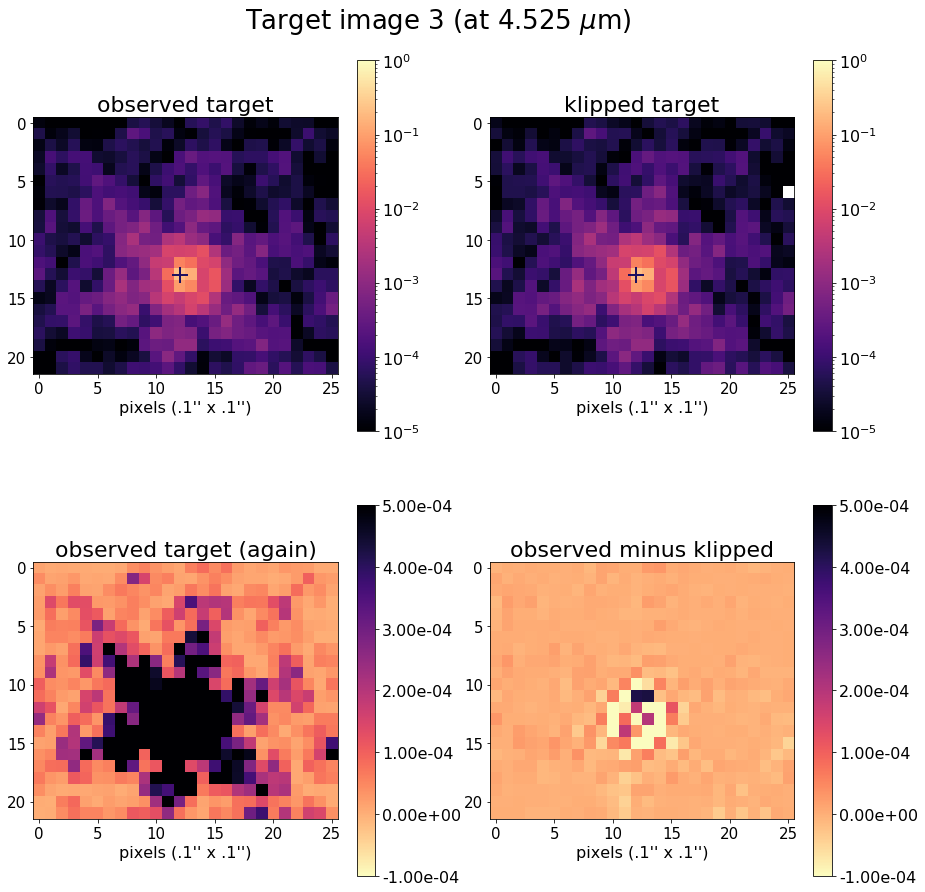

(0.9295004970184446, 0.009599044520576423)

In [3]:
#ex1.inject_companion(times_sigma=5)
ex1.plot_subtraction(target_image=3, wv_slice=-2)#, companion=True)

### Compare contrast and separation curves for multiple wavelenghts.

*(Awaiting a way to allow the user to set stellar parameters to go with the spectral information described earlier.)*


********
1 arcsecond contrast @2.87 microns
pre-sub:  1.0387e-03 | post-sub: 5.2184e-05
********

********
1 arcsecond contrast @4.11 microns
pre-sub:  2.3484e-03 | post-sub: 1.9022e-04
********

********
1 arcsecond contrast @4.94 microns
pre-sub:  3.6207e-03 | post-sub: 3.0599e-04
********


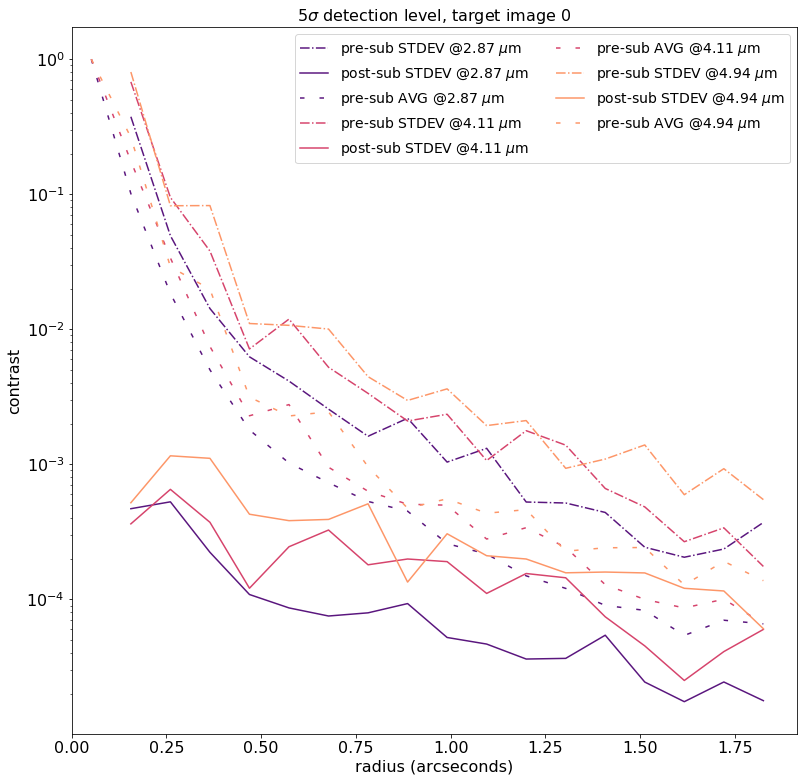

In [4]:
ex1.plot_contrasts()

### Key attributes:

- `data_cubes`, a list of HDULists that contains the original data cubes generated by WebbPSF via `KlipCreate`.
- `stackable_cubes`, an HDUList of data cubes where all slices are aligned and ready for PSF subtraction.
- `klip_proj`, an HDUList of KLIP projections of the *target* data cubes in `stackable_cubes`. (Created automatically through `_generate_klip_proj()`.)
- `injected_cubes`, an HDUList of *target* data cubes from `stackable_cubes` that have been injected with a companion. (Created automatically through `inject_companions()`.)

In [5]:
ex1.stackable_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REFERENCE0    1 ImageHDU       267   (26, 22, 6)   float64   
  1  REFERENCE1    1 ImageHDU       267   (26, 22, 6)   float64   
  2  REFERENCE2    1 ImageHDU       267   (26, 22, 6)   float64   
  3  REFERENCE3    1 ImageHDU       267   (26, 22, 6)   float64   
  4  REFERENCE4    1 ImageHDU       267   (26, 22, 6)   float64   
  5  REFERENCE5    1 ImageHDU       267   (26, 22, 6)   float64   
  6  REFERENCE6    1 ImageHDU       267   (26, 22, 6)   float64   
  7  REFERENCE7    1 ImageHDU       267   (26, 22, 6)   float64   
  8  REFERENCE8    1 ImageHDU       267   (26, 22, 6)   float64   
  9  REFERENCE9    1 ImageHDU       267   (26, 22, 6)   float64   
 10  TARGET0       1 ImageHDU       267   (26, 22, 6)   float64   
 11  TARGET1       1 ImageHDU       267   (26, 22, 6)   float64   
 12  TARGET2       1 ImageHDU       267   (26, 22, 6)   float64   
 13  TARGET3      

In [6]:
ex1.klip_proj.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TARGET0       1 ImageHDU       267   (26, 22, 6)   float64   
  1  TARGET1       1 ImageHDU       267   (26, 22, 6)   float64   
  2  TARGET2       1 ImageHDU       267   (26, 22, 6)   float64   
  3  TARGET3       1 ImageHDU       267   (26, 22, 6)   float64   
  4  TARGET4       1 ImageHDU       267   (26, 22, 6)   float64   
  5  TARGET5       1 ImageHDU       267   (26, 22, 6)   float64   
  6  TARGET6       1 ImageHDU       267   (26, 22, 6)   float64   
  7  TARGET7       1 ImageHDU       267   (26, 22, 6)   float64   
  8  TARGET8       1 ImageHDU       267   (26, 22, 6)   float64   
  9  TARGET9       1 ImageHDU       267   (26, 22, 6)   float64   


In [7]:
ex1.injected_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TARGET0       1 ImageHDU       270   (26, 22, 6)   float64   
  1  TARGET1       1 ImageHDU       270   (26, 22, 6)   float64   
  2  TARGET2       1 ImageHDU       270   (26, 22, 6)   float64   
  3  TARGET3       1 ImageHDU       270   (26, 22, 6)   float64   
  4  TARGET4       1 ImageHDU       270   (26, 22, 6)   float64   
  5  TARGET5       1 ImageHDU       270   (26, 22, 6)   float64   
  6  TARGET6       1 ImageHDU       270   (26, 22, 6)   float64   
  7  TARGET7       1 ImageHDU       270   (26, 22, 6)   float64   
  8  TARGET8       1 ImageHDU       270   (26, 22, 6)   float64   
  9  TARGET9       1 ImageHDU       270   (26, 22, 6)   float64   


More information about the observations is avilable through `positions` (the dither cycle used in this set of observations), `draws_ref` and `draws_sci` (the true stellar position in each data cube due to pointing and dither errors -- `point_err_ax` & `dith_err_ax`), `lo_wv` and `hi_wv` (the wavelength range of the spectrograph, in meters), and `wvlnths` (all the wavelengths observed, also in meters. its length is equal to the number of slices in each data cube).

All non-list/HDUList attributes are listed below:

In [8]:
{k:v for k,v in vars(ex1).items()
 if not isinstance(v, list)
 and not k.startswith('_')}

{'terminal_call': './make_img_dirs.py -n example_images -i 2 -os 4 -sl 6 -pterr True',
 'positions': array([[ 0.     ,  0.     ],
        [-0.175  , -0.125  ],
        [ 0.175  ,  0.125  ],
        [ 0.025  , -0.175  ],
        [-0.025  ,  0.175  ],
        [ 0.05   , -0.05   ],
        [-0.1    ,  0.     ],
        [ 0.05   ,  0.1    ],
        [ 0.1    ,  0.05   ],
        [-0.1    , -0.20001]]),
 'point_err_ax': array([[-0.06069782,  0.03729228],
        [-0.049204  ,  0.55215622]]),
 'dith_err_ax': array([[[ 1.74803738e-03,  7.70604456e-04],
         [-2.24410695e-04,  4.86368119e-03],
         [-1.21412584e-03, -4.68454596e-03],
         [-2.05157171e-03, -3.12363812e-03],
         [-7.54297551e-03,  1.25081924e-03],
         [ 7.86970028e-04, -8.14214189e-03],
         [-5.68782970e-05, -1.69247683e-03],
         [-1.84774311e-04,  5.69741073e-04],
         [ 5.12139802e-03,  2.99370773e-03],
         [-7.15241996e-03,  4.33043699e-04]],
 
        [[ 7.44420718e-04, -2.52690234e-